<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20full3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install tensorflow==1.14.0

In [3]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [4]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [7]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


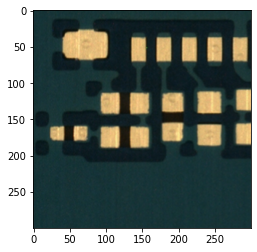

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
50.854916
53.868446
3.789697 3.789697
-0.9440576 -0.9440576


In [12]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

[0. 1.]


In [13]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [24]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))
x0=keras.layers.ZeroPadding2D(padding=(3, 3))(input1)

x1 = Conv2D(50,(4,4),strides=(2,2) ,activation='relu')(x0)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(50,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)


x9= Conv2D(50,(2,2),strides=(2,2) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= MaxPooling2D((3, 3), strides=(2, 2))(x11)






o=keras.layers.Flatten()(x11)








out = keras.layers.Dense(50,activation="relu")(o)
out=keras.layers.Dropout(0.4)(out)
out = keras.layers.Dense(50,activation="relu")(out)
out=keras.layers.Dropout(0.2)(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 152, 152, 50)      2450      
_________________________________________________________________
batch_normalization_4 (Batch (None, 152, 152, 50)      200       
_________________________________________________________________
activation_4 (Activation)    (None, 152, 152, 50)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 50)        1005

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [16]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [25]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, batch_size=60,epochs=40, verbose=1)

Epoch 1/40
1788/1788 [==============================] - 82s 46ms/step - loss: 0.3515 - acc: 0.8865
Epoch 2/40
1788/1788 [==============================] - 81s 45ms/step - loss: 0.2372 - acc: 0.9312
Epoch 3/40
1788/1788 [==============================] - 81s 45ms/step - loss: 0.2109 - acc: 0.9385
Epoch 4/40
1788/1788 [==============================] - 81s 45ms/step - loss: 0.1849 - acc: 0.9402
Epoch 5/40
1788/1788 [==============================] - 81s 46ms/step - loss: 0.1687 - acc: 0.9430
Epoch 6/40
1788/1788 [==============================] - 81s 45ms/step - loss: 0.1585 - acc: 0.9424
Epoch 7/40
1788/1788 [==============================] - 81s 46ms/step - loss: 0.1346 - acc: 0.9491
Epoch 8/40
1788/1788 [==============================] - 82s 46ms/step - loss: 0.1300 - acc: 0.9480
Epoch 9/40
1788/1788 [==============================] - 82s 46ms/step - loss: 0.1130 - acc: 0.9547
Epoch 10/40
1788/1788 [==============================] - 81s 46ms/step - loss: 0.1092 - acc: 0.9536
Epoch 11/

In [26]:
model.evaluate(xtest,ytest)

5040/5040 [==============================] - 95s 19ms/step


[1.6962928467792355, 0.5811507936507937]

In [19]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.26      0.38        46
     class 1       0.96      0.99      0.98       835

    accuracy                           0.95       881
   macro avg       0.81      0.63      0.68       881
weighted avg       0.95      0.95      0.95       881



In [20]:
model.evaluate(xtrain,ytrain)

1788/1788 [==============================] - 54s 30ms/step


[0.0045276638248026935, 0.9994407158836689]

In [21]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00       103
     class 1       1.00      1.00      1.00      1685

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [22]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/Aug_PCB'

In [23]:
import numpy as np
xtest=np.load("s_x_train.npy")
ytest=np.load("s_y_train.npy")
xtest  = xtest.astype('float32')


mean = np.mean(xtest)
std  = np.std(xtest)

print(mean)
print(std)


xtest -= mean
xtest /= std
ytest  =  to_categorical(ytest)
print(ytest[0])
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

0.20878915
0.20782994
[1. 0.]
              precision    recall  f1-score   support

     class 0       0.99      0.18      0.30      2520
     class 1       0.55      1.00      0.71      2520

    accuracy                           0.59      5040
   macro avg       0.77      0.59      0.51      5040
weighted avg       0.77      0.59      0.51      5040

